In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 49.0 MB/s eta 0:00:00


In [ ]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
Receiving objects: 100% (138/138), 1.72 MiB | 17.05 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-07-24 12:49:09--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::3403:4be7, 2406:da00:ff00::6b17:d1f5, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?response-conte

In [ ]:
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
#[출처] NameError: name 'Tagger' is not defined (부제: 왜 갑자기 잘되던 Mecab이 안되는 걸까?)|작성자 존이

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.6/581.6 kB 7.6 MB/s eta 0:00:00
  Created wheel for mecab-python: filename=mecab_python-1.0.0-py3-none-any.whl size=1232 sha256=3243395264c955fbbd5c23ce07fd2965c15ed1fac1a22d68ba8369bde5eec805
  Stored in directory: /root/.cache/pip/wheels/ec/41/c8/ce8fb469be2547ce596c4000613806505dc54c296aae45da71
Successfully built mecab-python
mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 38.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.1 which is incompatible.
tensorflow 2.12.0 

여기까지 실행 후 런타임 다시 실행 -> 코랩에서 MECAB 활용의 오류

필요한 것 Import

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

from konlpy.tag import Mecab
mecab = Mecab()
from tqdm import tqdm
import re
from gensim import corpora
import gensim
import pyLDAvis.gensim_models
from collections import Counter
import pandas as pd
import numpy as np
import re

import json
import warnings
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
import time
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


데이터 불러오기

In [ ]:
dataset_raw1 = pd.read_csv('/content/drive/MyDrive/논문준비/wori.csv',encoding='cp949')
dataset_raw3 = pd.read_csv('/content/drive/MyDrive/논문준비/hana.csv',encoding='cp949')
dataset_raw4 = pd.read_csv('/content/drive/MyDrive/논문준비/kookmin.csv',encoding='cp949')
dataset_raw5 = pd.read_csv('/content/drive/MyDrive/논문준비/신한은.csv',encoding='cp949')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfs = [dataset_raw1, dataset_raw3,dataset_raw4, dataset_raw5]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[     Unnamed: 0  Application_No Application_Date  Applicant Legal_State  \
 0             0    1.020170e+12       2017.06.20  주식회사 우리은행          등록   
 1             1    1.020130e+12       2013.06.28  주식회사 우리은행          등록   
 2             2    1.020130e+12       2013.06.27  주식회사 우리은행          등록   
 3             3    1.020130e+12       2013.06.28  주식회사 우리은행          등록   
 4             4    1.020120e+12       2012.07.11  주식회사 우리은행          등록   
 ..          ...             ...              ...        ...         ...   
 170         170    1.020210e+12       2021.08.27  주식회사 우리은행          공개   
 171         171    1.020210e+12       2021.02.25  주식회사 우리은행          공개   
 172         172    1.020210e+12       2021.08.30  주식회사 우리은행          공개   
 173         173    1.020210e+12       2021.06.16  주식회사 우리은행          공개   
 174         174    1.020210e+12       2021.06.16  주식회사 우리은행          공개   
 
                         PatentName_Kor  \
 0             관계 검증을 통한 동작 수행 방법 및 시스템   


불러온 것 합치기

In [ ]:
dataset_raw = pd.concat(dfs)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


필요한 내용만 남기기 IPC기준 G06Q,G06F

In [ ]:
def filter_values(value):
    return 'G06Q' in value and 'G06F' in value

# 조건에 맞는 값만 남기기
dataset_raw = dataset_raw[dataset_raw['IPC'].apply(filter_values)]

# 결과 출력
print(dataset_raw)

     Unnamed: 0  Application_No Application_Date                 Applicant  \
0             0    1.020170e+12       2017.06.20                 주식회사 우리은행   
3             3    1.020130e+12       2013.06.28                 주식회사 우리은행   
7             7    1.020120e+12       2012.11.23                 주식회사 우리은행   
15           15    1.020070e+12       2007.06.29                 주식회사 우리은행   
20           20    1.020170e+12       2017.07.03  주식회사 우리은행\n우리에프아이에스 주식회사   
..          ...             ...              ...                       ...   
337         337    1.020070e+12       2007.11.14                 주식회사 신한은행   
347         347    1.020030e+12       2003.11.19                 주식회사 신한은행   
348         348    1.020030e+12       2003.11.07                 주식회사 신한은행   
349         349    1.020020e+12       2002.09.23                 주식회사 신한은행   
350         350    1.020000e+12       2000.10.12                 주식회사 신한은행   

    Legal_State                   PatentName_Kor  \
0          

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dataset_raw

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Application_No,Application_Date,Applicant,Legal_State,PatentName_Kor,PatentName_Eng,IPC,CPC,Applicant_Count,Applicant_Nationality_Count,Inventor_Count,Inventor_Nationality_Count,Claim_Count,Family_Count,Expiration_Date,Summary_Text,Claim_Text
0,0,1.020170e+12,2017.06.20,주식회사 우리은행,등록,관계 검증을 통한 동작 수행 방법 및 시스템,Method and system for performing operation usi...,G06Q 40/02(2023.01.01) G06F 40/20(2020.01.01)...,G06Q 40/02(2023.01) G06F 40/20(2022.01) G06Q ...,1,1,1,1,12,0,NaN,본 발명은 관계 검증을 통한 동작 수행 방법 및 시스템에 관한 것이다. 상기 관계 ...,금융 서버가 제1 단말기로부터 수신한 메시지에서 전송 대상 및 수행 동작에 대한 ...
3,3,1.020130e+12,2013.06.28,주식회사 우리은행,등록,금융 거래 내역 제공 방법 및 이를 실행하는 서버,METHOD OF PROVIDING FINANCIAL TRANSACTIONS AND...,G06Q 40/02(2023.01.01) G06F 21/31(2013.01.01)...,G06Q 40/02(2023.01) G06F 21/31(2013.01) H04W ...,1,1,1,1,8,0,NaN,본 발명의 일 실시예에 따른 사용자의 단말과 연동된 금융 거래 내역 제공 서버에서 ...,사용자의 단말과 연동된 금융 거래 내역 제공 서버에서 실행되는 금융 거래 내역 제...
7,7,1.020120e+12,2012.11.23,주식회사 우리은행,등록,스팸 메시지 차단 방법 및 이를 실행하는 장치,METHOD OF INTERCEPTING SPAM MESSAGE AND APPARA...,G06Q 50/30(2012.01.01) H04L 51/00(2022.01.01)...,G06Q 50/30(2013.01) G06Q 50/30(2015.01) H04L ...,1,1,3,1,16,0,NaN,본 발명의 일 실시예에 따른 스팸 메시지 차단 방법은 발신자 단말과 연결된 스팸 메...,발신자 단말과 연결된 스팸 메시지 차단 장치에서 실행되는 스팸 메시지 차단 방법에...
15,15,1.020070e+12,2007.06.29,주식회사 우리은행,등록,아파트 관리비 처리 시스템 및 아파트 관리비 처리 방법,System and Method for Processing Apartment Man...,G06Q 20/14(2012.01.01) G06F 15/02(2018.01.01)...,G06Q 20/14(2013.01) G06F 15/0283(2013.01) H04...,1,1,3,1,14,0,NaN,아파트 관리비의 수납여부를 포함하는 수납 데이터를 자동으로 처리할 수 있고 관리사무...,하나 이상의 금융권 서버를 포함하는 외부 기관 서버 및 하나 이상의 아파트 관리 사...
20,20,1.020170e+12,2017.07.03,주식회사 우리은행\n우리에프아이에스 주식회사,등록,플로우 다이어그램 생성 방법 및 이를 실행하는 장치,FLOW DIAGRAM GENERATION METHOD AND APPARATUS P...,G06Q 10/10(2023.01.01) G06Q 10/06(2012.01.01)...,G06Q 10/103(2013.01) G06Q 10/063114(2013.01) ...,2,1,2,1,8,0,NaN,본 발명의 일 실시예에 따른 플로우 다이어그램 생성 방법은 특정 프로그래밍 언어로 ...,"플로우 다이어그램 생성 장치에서 실행되는 플로우 다이어그램 생성 방법에 있어서,다..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,337,1.020070e+12,2007.11.14,주식회사 신한은행,취하,전자 지불 및 결제 서비스 자동 등록 서버,Server for Auto-registering Electronical Payme...,G06Q 20/14(2012.01.01) G06F 17/30(2006.01.01)...,G06Q 20/145(2013.01) G06F 17/30(2013.01) G06Q...,1,1,3,1,1,0,NaN,"본 발명은 전자 지불 및 결제 서비스 자동 등록 서버에 대한 것으로서, 지로(또는 ...",지로(또는 공과금) 수납 장치와 인터넷 뱅킹 기반 지로(또는 공과금) 수납 시스템과...
347,347,1.020030e+12,2003.11.19,주식회사 신한은행,거절,대출 가능 금액 변동형 예금 담보 대출 시스템 및 방법,Loan Possibility an Amount of Money Fluctuatio...,G06Q 40/02(2023.01.01) G06Q 10/10(2023.01.01)...,G06Q 40/02(2023.01) G06Q 10/10(2023.01) G06Q ...,1,1,4,1,23,0,NaN,"본 발명은 대출 가능 금액 변동형 예금 담보 대출 시스템 및 방법에 관한 것으로, ...",고객으로부터 예금 담보 대출 관련 요청을 입력받고 예금 담보 대출 관련 정보를 해당...
348,348,1.020030e+12,2003.11.07,주식회사 신한은행,거절,인터넷 기반 금융상품 공동구매 시스템 및 방법,System And Method For Cooperative Buying Of Th...,G06Q 40/04(2023.01.01) G06Q 30/06(2023.01.01)...,G06Q 30/02(2023.01),1,1,3,1,15,0,NaN,"본 발명은 인터넷 기반 금융상품 공동구매 시스템 및 방법에 관한 것으로, 특히 인터...",인터넷 뱅킹 가입자인 고객으로부터 공동구매 관련 요청을 입력받고 공동구매 관련 정보...
349,349,1.020020e+12,2002.09.23,주식회사 신한은행,거절,은행 온라인망을 기반으로 하는 기업간 대금결제 관리 방법,Method for managing a payment relation between...,G06Q 40/02(2023.01.01) G06Q 20/12(2012.01.01)...,G06Q 40/025(2013.01),1,1,2,1,7,0,NaN,"본 발명은 은행 온라인망을 기반으로 하는 기업간 대금결제 관리 방법에 관한 것으로,...",은행 온라인망에 소속된 대금결제 관리 서버가 상기 은행과 구매대금 결제전용 대출을 ...


In [ ]:
dataset_raw.isnull().sum()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0                      0
Application_No                  0
Application_Date                0
Applicant                       0
Legal_State                     0
PatentName_Kor                  0
PatentName_Eng                  0
IPC                             0
CPC                             0
Applicant_Count                 0
Applicant_Nationality_Count     0
Inventor_Count                  0
Inventor_Nationality_Count      0
Claim_Count                     0
Family_Count                    0
Expiration_Date                96
Summary_Text                    0
Claim_Text                      0
dtype: int64

불용어 리스트 불러오기

In [ ]:
stopword_list = pd.read_excel('/content/drive/MyDrive/논문준비/stopword.xlsx')
stopword_list.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,stopword
1066,대상
1067,금액
1068,한도
1069,동단
1070,요금


In [ ]:
Patent_pos = dataset_raw['Summary_Text']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Patent_pos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      본 발명은 관계 검증을 통한 동작 수행 방법 및 시스템에 관한 것이다. 상기 관계 ...
3      본 발명의 일 실시예에 따른 사용자의 단말과 연동된 금융 거래 내역 제공 서버에서 ...
7      본 발명의 일 실시예에 따른 스팸 메시지 차단 방법은 발신자 단말과 연결된 스팸 메...
15     아파트 관리비의 수납여부를 포함하는 수납 데이터를 자동으로 처리할 수 있고 관리사무...
20     본 발명의 일 실시예에 따른 플로우 다이어그램 생성 방법은 특정 프로그래밍 언어로 ...
                             ...                        
337    본 발명은 전자 지불 및 결제 서비스 자동 등록 서버에 대한 것으로서, 지로(또는 ...
347    본 발명은 대출 가능 금액 변동형 예금 담보 대출 시스템 및 방법에 관한 것으로, ...
348    본 발명은 인터넷 기반 금융상품 공동구매 시스템 및 방법에 관한 것으로, 특히 인터...
349    본 발명은 은행 온라인망을 기반으로 하는 기업간 대금결제 관리 방법에 관한 것으로,...
350    본 발명은 인터넷을 통하여 단위형 펀드를 조성하고, 이의 조성된 펀드를 대출하는 은...
Name: Summary_Text, Length: 104, dtype: object

In [ ]:
Patent_tokenized_pos = list(map(lambda patent: mecab.nouns(patent), patent_pos))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


함수들 선언, 불용어, Topicmodeling...

In [ ]:
def remove_stopword(tokens):
    Patent_removed_stopword = []
    for token in tokens:
        # 토큰의 글자 수가 2글자 이상인 경우
        if 1 < len(token):
            # 토큰이 불용어가 아닌 경우만 분석용 리뷰 데이터로 포함
            if token not in list(stopword_list['stopword']):
                Patent_removed_stopword.append(token)

    return Patent_removed_stopword
def lda_modeling(Patent):
    # 단어 인코딩 및 빈도수 계산
    dictionary = corpora.Dictionary(Patent)
    corpus = [dictionary.doc2bow(Patent) for Patent in Patent_prep]
    # LDA 모델 학습
    model = gensim.models.ldamodel.LdaModel(corpus,
                                            num_topics = NUM_TOPICS,
                                            id2word = dictionary,
                                            passes = PASSES,
                                            iterations= ITER)
    return model, corpus, dictionary

def print_topic_prop(topics, RATING):
    topic_values = []
    for topic in topics:
        topic_value = topic[1]
        topic_values.append(topic_value)
    topic_prop = pd.DataFrame({"topic_num" : list(range(1, NUM_TOPICS + 1)), "word_prop": topic_values})
    topic_prop.to_excel('topic_prop.xlsx', index=True)

    display(topic_prop)

def lda_visualize(model, corpus, dictionary, RATING):
    pyLDAvis.enable_notebook()
    result_visualized = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
    pyLDAvis.display(result_visualized)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def remove_stopword(tokens):
    review_removed_stopword = []
    for token in tokens:
        # 토큰의 글자 수가 2글자 이상인 경우
        if 1 < len(token):
            # 토큰이 불용어가 아닌 경우만 분석용 리뷰 데이터로 포함
            if token not in list(stopword_list['stopword']):
                Patent_removed_stopword.append(token)

    return Patent_removed_stopword

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
ITER = 1000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Patent_removed_stopword_pos = list(map(lambda tokens : Patent_stopword(tokens), Patent_tokenized_pos))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Patent_prep_pos = Patent_removed_stopword_pos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Patent_num_pos = len(Patent_prep_pos)


print(f"분석한 특허 총 개수: {Patent_num_pos}")


분석한 리뷰 총 개수: 104


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Patent_prep_pos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['관계',
  '검증',
  '동작',
  '수행',
  '시스템',
  '관계',
  '검증',
  '동작',
  '수행',
  '단말기',
  '수신',
  '메시지',
  '전송',
  '대상',
  '수행',
  '동작',
  '키워드',
  '추출',
  '단말기',
  '저장',
  '복수',
  '연락처',
  '단말기',
  '사용자',
  '관계',
  '수신',
  '관계',
  '복수',
  '연락처',
  '대응',
  '단말기',
  '관계',
  '판단',
  '관계',
  '전송',
  '대상',
  '대응',
  '특정',
  '선정',
  '선정',
  '특정',
  '수행',
  '동작',
  '단말기',
  '단말기',
  '특정',
  '수신인',
  '수행',
  '동작',
  '실행'],
 ['실시',
  '기기',
  '활용',
  '영업',
  '내부',
  '업무',
  '프로세스',
  '모바일',
  '연계',
  '채널',
  '유기',
  '융합',
  '업무',
  '프로세스',
  '구축',
  '거래',
  '활성',
  '업무',
  '효율',
  '개선',
  '실행',
  '서버',
  '목적'],
 ['회비',
  '입출금',
  '내역',
  '관리',
  '장치',
  '실시',
  '회비',
  '회비',
  '입출금',
  '내역',
  '관리',
  '회비',
  '지정',
  '계좌',
  '인출',
  '대상',
  '출금액',
  '출금',
  '메시지',
  '검출',
  '출금',
  '메시지',
  '더치페이',
  '생성',
  '지정',
  '계좌',
  '입금액',
  '입금',
  '메시지',
  '검출',
  '더치페이',
  '잔액',
  '입금액',
  '차감',
  '저장',
  '지정',
  '계좌',
  '입출금',
  '내역',
  '실시간',
  '입금',
  '메시지',
  '출금',
  '메시지',
  '회비',
  '지출',
  '회비',
  '정

In [ ]:
# Dictionary 객체 생성
texts = Patent_prep_pos
dictionary = Dictionary(texts)

# 문서-단어 행렬 생성
corpus = [dictionary.doc2bow(text) for text in texts]
texts = Patent_prep_pos


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


최적의 토픽수 및 단어수 설정

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of Topics: 5, Number of Words: 5, Coherence Score: 0.3611193732627501
Number of Topics: 5, Number of Words: 10, Coherence Score: 0.398826917666047
Number of Topics: 5, Number of Words: 15, Coherence Score: 0.3660517919154006
Number of Topics: 10, Number of Words: 5, Coherence Score: 0.4248632905225029
Number of Topics: 10, Number of Words: 10, Coherence Score: 0.3369635993554171
Number of Topics: 10, Number of Words: 15, Coherence Score: 0.34325528560142093
Number of Topics: 15, Number of Words: 5, Coherence Score: 0.3560181729813795
Number of Topics: 15, Number of Words: 10, Coherence Score: 0.3114358851710476
Number of Topics: 15, Number of Words: 15, Coherence Score: 0.32669661934062255
Number of Topics: 20, Number of Words: 5, Coherence Score: 0.39472761999279893
Number of Topics: 20, Number of Words: 10, Coherence Score: 0.40105857235433123
Number of Topics: 20, Number of Words: 15, Coherence Score: 0.3742795232630544
Number of Topics: 25, Number of Words: 5, Coherence Scor

ValueError: ignored

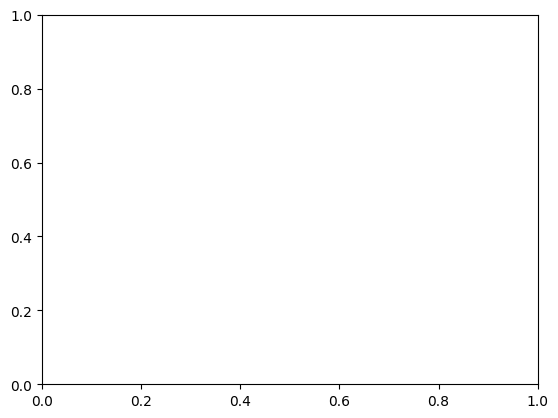

In [ ]:
from gensim.models import CoherenceModel

def compute_coherence_values(corpus, dictionary, texts, num_topics, num_words):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=1000,iterations=1000)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()
    return coherence

num_topics_range = [5, 10, 15,20,25]
num_words_range = [5, 10, 15]

coherence_scores = []

for num_topics in num_topics_range:
    for num_words in num_words_range:

        coherence = compute_coherence_values(corpus, dictionary, texts, num_topics=num_topics, num_words=num_words)
        coherence_scores.append((num_topics, num_words, coherence))


for num_topics, num_words, coherence in coherence_scores:
    print(f"Number of Topics: {num_topics}, Number of Words: {num_words}, Coherence Score: {coherence}")


x = range(start, limit, step)
plt.plot(x, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score by Number of Topics")
plt.show()


In [ ]:
NUM_TOPICS = 10 # 토픽 개수는 하이퍼파라미터
PASSES = 1000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
NUM_WORDS = 5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model, corpus, dictionary = lda_modeling(Patent_prep_pos)
NUM_WORDS = 5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
RATING = 'pos'
topics = model.print_topics(num_words = NUM_WORDS)
print_topic_prop(topics, RATING)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic_num,word_prop
0,1,"0.056*""프로그램"" + 0.043*""코드"" + 0.040*""단어"" + 0.040..."
1,2,"0.040*""서버"" + 0.032*""거래"" + 0.029*""관리"" + 0.027*""..."
2,3,"0.069*""이미지"" + 0.046*""단말"" + 0.036*""수신"" + 0.033*..."
3,4,"0.071*""인증"" + 0.039*""대출"" + 0.030*""계좌"" + 0.026*""..."
4,5,"0.049*""관리"" + 0.030*""시스템"" + 0.027*""압류"" + 0.027*..."
5,6,"0.070*""계좌"" + 0.036*""서버"" + 0.032*""게임"" + 0.022*""..."
6,7,"0.058*""대출"" + 0.034*""증권"" + 0.029*""펀드"" + 0.025*""..."
7,8,"0.029*""이미지"" + 0.025*""수신"" + 0.019*""메시지"" + 0.019..."
8,9,"0.067*""인증"" + 0.032*""계좌"" + 0.026*""로그인"" + 0.026*..."
9,10,"0.029*""관리"" + 0.025*""업무"" + 0.023*""인터페이스"" + 0.02..."


In [ ]:
lda_visualize(model, corpus, dictionary, RATING)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
from IPython.display import display, HTML

def lda_visualize(model, corpus, dictionary, RATING):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
    pyLDAvis.save_html(vis, 'lda_visualization.html')
    display(HTML('lda_visualization.html'))

lda_visualize(model, corpus, dictionary, RATING)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model, corpus, dictionary = lda_modeling(Patent_prep_pos)
lda_visualize(model, corpus, dictionary, "all")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 주어진 문서에 대한 토픽 분포 추출
def get_document_topic_distribution(model, corpus):
    topic_dist = []
    for doc in corpus:
        doc_topic_dist = [0] * model.num_topics
        topics = model[doc]
        for topic in topics:
            topic_idx = topic[0]
            topic_prob = topic[1]
            doc_topic_dist[topic_idx] = topic_prob
        topic_dist.append(doc_topic_dist)
    return topic_dist
lda_topic_dist = get_document_topic_distribution(model, corpus)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_topic_dist = get_document_topic_distribution(model, corpus)

print("Document Topic Distribution:")
for i, doc_topic_dist in enumerate(lda_topic_dist):
    print(f"Document {i+1}: {doc_topic_dist}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Document Topic Distribution:
Document 1: [0, 0, 0.73692334, 0, 0.25128204]
Document 2: [0, 0, 0, 0, 0.96597457]
Document 3: [0, 0, 0.09701777, 0.50860727, 0.3861356]
Document 4: [0, 0.94475555, 0, 0.044393145, 0]
Document 5: [0.8901961, 0, 0, 0.09762981, 0]
Document 6: [0, 0, 0, 0, 0.9894236]
Document 7: [0, 0, 0.55770826, 0.098463096, 0.33726278]
Document 8: [0, 0.98857605, 0, 0, 0]
Document 9: [0, 0, 0.98398834, 0, 0]
Document 10: [0.9797088, 0, 0, 0, 0]
Document 11: [0, 0.16705345, 0.82123035, 0, 0]
Document 12: [0, 0, 0, 0, 0.9883592]
Document 13: [0, 0, 0.41689846, 0.14589259, 0.4324296]
Document 14: [0, 0, 0.95376545, 0, 0.039838903]
Document 15: [0.1452969, 0, 0.58100444, 0.26781887, 0]
Document 16: [0, 0, 0, 0.9920558, 0]
Document 17: [0, 0.020693064, 0, 0.9560764, 0.019751733]
Document 18: [0, 0, 0, 0, 0.98894507]
Document 19: [0, 0.37873888, 0, 0.09125098, 0.5236094]
Document 20: [0.681666, 0, 0, 0, 0.3104048]
Document 21: [0, 0.9817749, 0, 0, 0]
Document 22: [0, 0.90626997, 